In [1]:
import json

jsonl_path = './data/datasets—nnmeter/alexnets.jsonl'

data = []
with open(jsonl_path, 'r') as f:
    for line in f:
        data.append(json.loads(line))

# 打印前几个样本查看格式
for i, item in enumerate(data[:3]):
    print(f"Sample {i+1}:")
    print(item)

# jsonl_path = './data/datasets—nnmeter/mobilenetv3s.jsonl'
# data = []
# with open(jsonl_path, 'r') as f:
#     for line in f:
#         data.append(json.loads(line))
# # 打印前几个样本查看格式
# for i, item in enumerate(data[:3]):
#     print(f"Sample {i+1}:")
#     print(item)

Sample 1:
{'id': 'alexnet_1356', 'cortexA76cpu_tflite21': 148.164, 'adreno640gpu_tflite21': 24.4851, 'adreno630gpu_tflite21': 31.932404999999996, 'myriadvpu_openvino2019r2': 15.486, 'graph': {'input_im_0': {'inbounds': [], 'attr': {'name': 'input_im_0', 'type': 'Placeholder', 'output_shape': [[1, 224, 224, 3]], 'attr': {'shape': [1, 224, 224, 3]}, 'input_shape': []}, 'outbounds': ['conv1.conv/Conv2D']}, 'conv1.conv/Conv2D': {'inbounds': ['input_im_0'], 'attr': {'name': 'conv1.conv/Conv2D', 'type': 'Conv2D', 'output_shape': [[1, 56, 56, 63]], 'attr': {'dilations': [1, 1], 'strides': [4, 4], 'data_format': 'NHWC', 'padding': 'VALID', 'kernel_shape': [7, 7], 'weight_shape': [7, 7, 3, 63], 'pads': [0, 0, 0, 0]}, 'input_shape': [[1, 224, 224, 3]]}, 'outbounds': ['conv1.relu.relu/Relu']}, 'conv1.relu.relu/Relu': {'inbounds': ['conv1.conv/Conv2D'], 'attr': {'name': 'conv1.relu.relu/Relu', 'type': 'Relu', 'output_shape': [[1, 56, 56, 63]], 'attr': {}, 'input_shape': [[1, 56, 56, 63]]}, 'outbou

In [2]:
len(data)

1998

In [3]:
data = data[0]

In [4]:
data.keys()

dict_keys(['id', 'cortexA76cpu_tflite21', 'adreno640gpu_tflite21', 'adreno630gpu_tflite21', 'myriadvpu_openvino2019r2', 'graph'])

In [5]:
data['id']

'alexnet_1356'

In [6]:
data['cortexA76cpu_tflite21'], data['adreno640gpu_tflite21'], data['adreno630gpu_tflite21'], data['myriadvpu_openvino2019r2']

(148.164, 24.4851, 31.932404999999996, 15.486)

In [7]:
data['graph']

{'input_im_0': {'inbounds': [],
  'attr': {'name': 'input_im_0',
   'type': 'Placeholder',
   'output_shape': [[1, 224, 224, 3]],
   'attr': {'shape': [1, 224, 224, 3]},
   'input_shape': []},
  'outbounds': ['conv1.conv/Conv2D']},
 'conv1.conv/Conv2D': {'inbounds': ['input_im_0'],
  'attr': {'name': 'conv1.conv/Conv2D',
   'type': 'Conv2D',
   'output_shape': [[1, 56, 56, 63]],
   'attr': {'dilations': [1, 1],
    'strides': [4, 4],
    'data_format': 'NHWC',
    'padding': 'VALID',
    'kernel_shape': [7, 7],
    'weight_shape': [7, 7, 3, 63],
    'pads': [0, 0, 0, 0]},
   'input_shape': [[1, 224, 224, 3]]},
  'outbounds': ['conv1.relu.relu/Relu']},
 'conv1.relu.relu/Relu': {'inbounds': ['conv1.conv/Conv2D'],
  'attr': {'name': 'conv1.relu.relu/Relu',
   'type': 'Relu',
   'output_shape': [[1, 56, 56, 63]],
   'attr': {},
   'input_shape': [[1, 56, 56, 63]]},
  'outbounds': ['conv1.maxpool/maxpool']},
 'conv1.maxpool/maxpool': {'inbounds': ['conv1.relu.relu/Relu'],
  'attr': {'name':

In [36]:
from nn_meter.utils.graph_tool import ModelGraph
import json
import networkx as nx
data = []
with open(jsonl_path, 'r') as f:
    for line in f:
        data.append(json.loads(line))
data = data[0]['graph']
graph = convert_to_graph(graph_data)
graph

In [ ]:
from nn_meter.utils.graph_tool import ModelGraph
import json
import networkx as nx

# 加载nn - Meter IR Graph格式的JSON文件
def load_nn_meter_ir_graph(json_file_path):
    with open(json_file_path, 'r') as f:
        graph_data = json.load(f)
    return graph_data

# 将JSON数据转换为图结构
def convert_to_graph(graph_data):
    model_graph = ModelGraph(graph=graph_data)
    # 刷新图结构，确保入边和出边信息准确
    model_graph.refresh()
    return model_graph

# 替换为你的nn - Meter IR Graph格式的JSON文件路径
# json_file_path = "data/datasets—nnmeter/graph/alexnet_0.json"
json_file_path = "./data/datasets—nnmeter/alexnets.jsonl"
graph_data = load_nn_meter_ir_graph(json_file_path)
graph = convert_to_graph(graph_data)

# 将ModelGraph对象转换为networkx图
networkx_graph = graph.get_networkx_graph()

# 打印图的基本信息
print(f"节点数量: {networkx_graph.number_of_nodes()}")
print(f"边的数量: {networkx_graph.number_of_edges()}")

# 查看节点的属性
for node, data in networkx_graph.nodes(data=True):
    print(f"节点: {node}, 属性: {data}")

# 查看边的属性
for u, v, data in networkx_graph.edges(data=True):
    print(f"边: ({u}, {v}), 属性: {data}")

JSONDecodeError: Extra data: line 2 column 1 (char 6044)

In [9]:
type(networkx_graph)

networkx.classes.multidigraph.MultiDiGraph

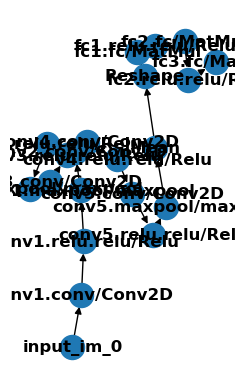

In [10]:
graph.plot_graphs()
graph.plot_networkx_graph()

In [22]:
from nn_meter.builder.kernel_predictor_builder.predictor_builder.extract_feature import BaseFeatureParser, FlopsParamParser, get_feature_parser

# 假设内核类型为 'conv-bn-relu'
kernel_type = 'conv-bn-relu'
# 获取特征解析器
parser = get_feature_parser(kernel_type)

# 示例配置字典
config_dict = {
    "HW": 14,
    "CIN": 98,
    "COUT": 120,
    "KERNEL_SIZE": 3,
    "STRIDES": 1
}

# 提取特征
features = parser.get_feature_by_config(config_dict)
print(f"提取的特征: {features}")

提取的特征: [14, 98, 120, 3, 1, 20.76816, 0.10596]


In [ ]:
from nn_meter.utils.graph_tool import ModelGraph
import numpy as np
import torch

def get_unified_operator_features(model_graph):
    """
    从ModelGraph中提取所有节点的算子特征，并确保特征维度一致
    
    返回:
        node_features: 字典，键为节点名称，值为固定长度的特征向量
        feature_names: 特征向量各维度的名称
    """
    # 定义所有可能的特征维度及其顺序
    feature_names = [
        'type_placeholder', 'type_conv2d', 'type_relu', 'type_maxpool', 
        'type_mean', 'type_reshape', 'type_matmul',
        'input_h', 'input_w', 'input_c', 'output_c',
        'kernel_h', 'kernel_w', 'stride_h', 'stride_w',
        'padding_valid', 'padding_same', 'reduction_indices',
        'reshape_dim1', 'reshape_dim2', 'reshape_dim3', 'reshape_dim4'
    ]
    
    node_features = {}
    
    for node_name in model_graph.get_graph().keys():
        node_attr = model_graph.get_node_attr(node_name)
        node_type = node_attr["type"]
        
        # 初始化特征向量，默认值为0
        feature_vector = np.zeros(len(feature_names), dtype=np.float32)
        
        # 设置算子类型的独热编码
        type_indices = {
            'Placeholder': 0, 'Conv2D': 1, 'Relu': 2, 
            'MaxPool': 3, 'Mean': 4, 'Reshape': 5, 'MatMul': 6
        }
        if node_type in type_indices:
            feature_vector[type_indices[node_type]] = 1.0
        
        # 根据算子类型填充其他特征
        if node_type == 'Placeholder':
            shape = node_attr["attr"]["shape"]
            if len(shape) == 4:  # NHWC格式
                feature_vector[7] = shape[1]  # input_h
                feature_vector[8] = shape[2]  # input_w
                feature_vector[9] = shape[3]  # input_c
                
        elif node_type == 'Conv2D':
            kernel_shape = node_attr["attr"]["kernel_shape"]
            strides = node_attr["attr"]["strides"]
            padding = node_attr["attr"]["padding"]
            weight_shape = node_attr["attr"]["weight_shape"]
            
            feature_vector[9] = weight_shape[2]  # input_c
            feature_vector[10] = weight_shape[3]  # output_c
            feature_vector[11] = kernel_shape[0]  # kernel_h
            feature_vector[12] = kernel_shape[1]  # kernel_w
            
            # 处理不同长度的strides列表
            if len(strides) == 4:  # 格式为 [1, h, w, 1]
                feature_vector[13] = strides[1]  # stride_h
                feature_vector[14] = strides[2]  # stride_w
            elif len(strides) == 2:  # 格式为 [h, w]
                feature_vector[13] = strides[0]  # stride_h
                feature_vector[14] = strides[1]  # stride_w
            
            # 填充方式的独热编码
            if padding == 'VALID':
                feature_vector[15] = 1.0
            elif padding == 'SAME':
                feature_vector[16] = 1.0
                
        elif node_type == 'MaxPool':
            ksize = node_attr["attr"]["ksize"]
            strides = node_attr["attr"]["strides"]
            padding = node_attr["attr"]["padding"]
            
            # 处理不同长度的ksize列表
            if len(ksize) == 4:  # 格式为 [1, h, w, 1]
                feature_vector[11] = ksize[1]  # kernel_h
                feature_vector[12] = ksize[2]  # kernel_w
            elif len(ksize) == 2:  # 格式为 [h, w]
                feature_vector[11] = ksize[0]  # kernel_h
                feature_vector[12] = ksize[1]  # kernel_w
            
            # 处理不同长度的strides列表
            if len(strides) == 4:  # 格式为 [1, h, w, 1]
                feature_vector[13] = strides[1]  # stride_h
                feature_vector[14] = strides[2]  # stride_w
            elif len(strides) == 2:  # 格式为 [h, w]
                feature_vector[13] = strides[0]  # stride_h
                feature_vector[14] = strides[1]  # stride_w
            
            # 填充方式的独热编码
            if padding == 'VALID':
                feature_vector[15] = 1.0
            elif padding == 'SAME':
                feature_vector[16] = 1.0
                
        elif node_type == 'Mean':
            reduction_indices = node_attr["attr"]["reduction_indices"]
            # 将reduction_indices编码为一个数字（简化处理）
            if reduction_indices:
                feature_vector[17] = sum(reduction_indices)
                
        elif node_type == 'Reshape':
            shape = node_attr["attr"]["shape"]
            # 将reshape的目标形状编码到特征向量中
            for i in range(min(len(shape), 4)):
                feature_vector[18 + i] = shape[i]
                
        # 对于MatMul类型，特征向量已经由类型的独热编码填充
        
        # 保存特征向量
        node_features[node_name] = torch.tensor(feature_vector, dtype=torch.float32)
    
    return node_features, feature_names

# 使用示例
model_graph = graph
node_features, feature_names = get_unified_operator_features(model_graph)

# 打印第一个和第二个节点的特征维度是否一致
if node_features:
    nodes = list(node_features.keys())
    if len(nodes) >= 2:
        print(f"第一个节点({nodes[0]})和第二个节点({nodes[1]})的特征维度是否一致:")
        print(node_features[nodes[0]].shape == node_features[nodes[1]].shape)
        print(f"特征维度: {node_features[nodes[0]].shape}")

第一个节点(input_im_0)和第二个节点(conv1.conv/Conv2D)的特征维度是否一致:
True
特征维度: torch.Size([22])


In [ ]:
import dgl
import networkx as nx
import torch

def convert_nx_to_dgl(nx_graph, node_features):
    """
    将NetworkX图转换为DGL图，并保留节点特征
    
    参数:
        nx_graph: NetworkX图对象
        node_features: 节点特征字典，键为节点名称，值为特征张量
    
    返回:
        dgl_graph: DGL图对象
    """
    # 创建空的DGL图
    dgl_graph = dgl.DGLGraph()
    
    # 添加节点
    node_names = list(nx_graph.nodes())
    dgl_graph.add_nodes(len(node_names))
    
    # 添加边
    edges = list(nx_graph.edges())
    src_nodes = [node_names.index(u) for u, v in edges]
    dst_nodes = [node_names.index(v) for u, v in edges]
    dgl_graph.add_edges(src_nodes, dst_nodes)
    
    # 设置节点特征
    if node_features:
        # 确保所有节点都有特征
        for node_name in node_names:
            if node_name not in node_features:
                raise ValueError(f"节点 {node_name} 没有对应的特征")
        
        # 收集所有节点的特征
        feature_list = [node_features[node_name] for node_name in node_names]
        
        # 将特征列表转换为张量
        feature_tensor = torch.stack(feature_list, dim=0)
        
        # 设置节点特征
        dgl_graph.ndata['feat'] = feature_tensor
    
    return dgl_graph

# 使用示例
nx_graph = model_graph.get_networkx_graph()  # 获取NetworkX图
dgl_graph = convert_nx_to_dgl(nx_graph, node_features)

# 打印DGL图的基本信息
print(f"节点数量: {dgl_graph.num_nodes()}")
print(f"边的数量: {dgl_graph.num_edges()}")
print(f"节点特征形状: {dgl_graph.ndata['feat'].shape}")
dgl_graph

节点数量: 21
边的数量: 20
节点特征形状: torch.Size([21, 22])


/home/rtx4090/anaconda3/lib/python3.12/site-packages/dgl/heterograph.py:92: DGLWarning: Recommend creating graphs by `dgl.graph(data)` instead of `dgl.DGLGraph(data)`.
  dgl_warning(


Graph(num_nodes=21, num_edges=20,
      ndata_schemes={'feat': Scheme(shape=(22,), dtype=torch.float32)}
      edata_schemes={})